In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import sys; sys.path

['',
 '/home/nikhil/anaconda3/envs/fastai/lib/python36.zip',
 '/home/nikhil/anaconda3/envs/fastai/lib/python3.6',
 '/home/nikhil/anaconda3/envs/fastai/lib/python3.6/lib-dynload',
 '/home/nikhil/anaconda3/envs/fastai/lib/python3.6/site-packages',
 '/home/nikhil/anaconda3/envs/fastai/lib/python3.6/site-packages/torchvision-0.2.0-py3.6.egg',
 '/home/nikhil/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/extensions',
 '/home/nikhil/.ipython']

In [3]:
sys.path.append('/home/nikhil/fastai')

In [4]:
from fastai.imports import *
from fastai.torch_imports import resnet34
from fastai.dataset import ImageClassifierData
from fastai.transforms import tfms_from_model, transforms_side_on, transforms_top_down
from fastai.conv_learner import ConvLearner

In [5]:
PATH = '/home/nikhil/data/fruits-360/'


In [6]:
# import glob
# import random
# training = glob.glob(PATH +'Training' + '/**/*.jpg', recursive=True)


In [7]:
# images = []
# for t in training:
#     images.append(random.choice(training))
#     if len(images) > 20:
#         break

# plt.figure(figsize=(20,10))
# columns = 5
# for i, t in enumerate(images):
#     plt.subplot(len(images) / columns + 1, columns, i + 1)
#     img = plt.imread(t)

#     plt.title(t.split('/')[-2] + '-' + t.split('/')[-1])
#     plt.imshow(img)


In [31]:
# img.shape, img.size, len(training)

((100, 100, 3), 30000, 28736)

In [6]:
sz = 64
arch = resnet34

In [7]:
# ConvLearner.pretrained??

In [8]:
data = ImageClassifierData.from_paths(path=PATH,tfms=tfms_from_model(f_model=arch,sz=sz), trn_name='Training', val_name='Validation',)
learn = ConvLearner.pretrained(arch, data, precompute=True)

> /home/nikhil/fastai/fastai/dataset.py(343)from_paths()
    341         from IPython.core.debugger import set_trace;set_trace()
    342 
--> 343         trn,val = [folder_source(path, o) for o in (trn_name, val_name)]
    344         test_fnames = read_dir(path, test_name) if test_name else None
    345         datasets = cls.get_ds(FilesIndexArrayDataset, trn, val, tfms, path=path, test=test_fnames)

ipdb> c


In [9]:
learn.model

Sequential(
  (0): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True)
  (1): Dropout(p=0.25)
  (2): Linear(in_features=1024, out_features=512)
  (3): ReLU()
  (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=512, out_features=60)
  (7): LogSoftmax()
)

In [10]:
learn.fit(0.1, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.063229   0.077817   0.971628  
    1      0.030538   0.0593     0.978721                     
    2      0.016818   0.046074   0.981394                     
    3      0.019054   0.068858   0.978618                     
    4      0.014512   0.046912   0.98345                      
    5      0.007679   0.041056   0.984683                      
    6      0.007753   0.041652   0.986534                      



[0.04165197, 0.9865337171052632]

In [11]:
log_preds = learn.predict()

In [12]:
log_preds.shape


(9673, 60)

In [17]:
probs = np.exp(log_preds)
preds =probs.argmax(axis=1)

In [19]:
from collections import Counter
pred_counts = Counter(preds)
pred_dict = dict(pred_counts)
pred_dict_class = {}
i = 0
for key, value in pred_dict.items():
    pred_dict_class[data.classes[i]] = value
    i += 1
    
pred_dict_class

{'Apple Braeburn': 198,
 'Apple Golden 1': 138,
 'Apple Golden 2': 163,
 'Apple Golden 3': 167,
 'Apple Granny Smith': 161,
 'Apple Red 1': 144,
 'Apple Red 2': 182,
 'Apple Red 3': 162,
 'Apple Red Delicious': 160,
 'Apple Red Yellow': 148,
 'Apricot': 166,
 'Avocado': 156,
 'Avocado ripe': 165,
 'Banana': 167,
 'Banana Red': 164,
 'Cactus fruit': 143,
 'Carambula': 166,
 'Cherry': 166,
 'Clementine': 166,
 'Cocos': 166,
 'Dates': 164,
 'Granadilla': 160,
 'Grape Pink': 169,
 'Grape White': 166,
 'Grape White 2': 166,
 'Grapefruit Pink': 166,
 'Grapefruit White': 179,
 'Guava': 166,
 'Huckleberry': 179,
 'Kaki': 166,
 'Kiwi': 164,
 'Kumquats': 166,
 'Lemon': 166,
 'Lemon Meyer': 169,
 'Limes': 156,
 'Litchi': 166,
 'Mandarine': 82,
 'Mango': 166,
 'Maracuja': 166,
 'Nectarine': 166,
 'Orange': 166,
 'Papaya': 166,
 'Passion Fruit': 166,
 'Peach': 156,
 'Peach Flat': 160,
 'Pear': 160,
 'Pear Abate': 166,
 'Pear Monster': 163,
 'Pear Williams': 166,
 'Pepino': 166,
 'Pineapple': 153,
 

In [20]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])
        
def load_img_id(ds, idx): 
    return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))


Correctly classified


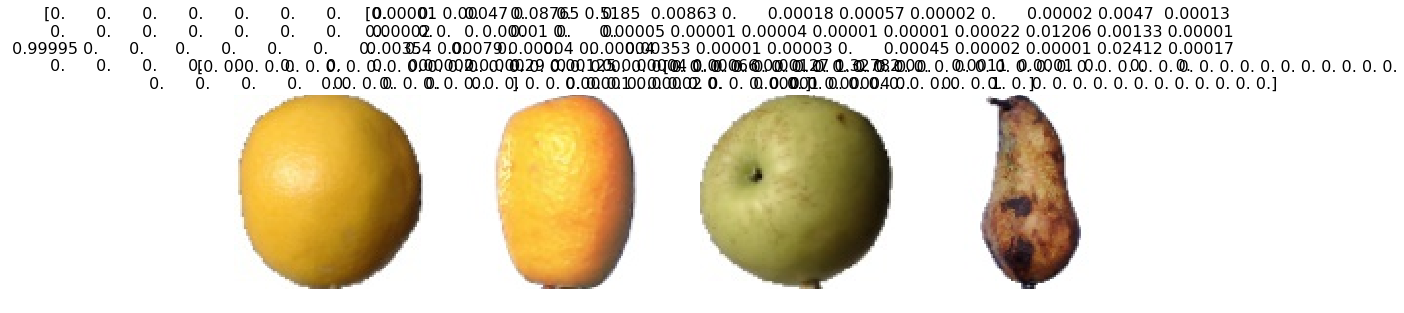

In [21]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


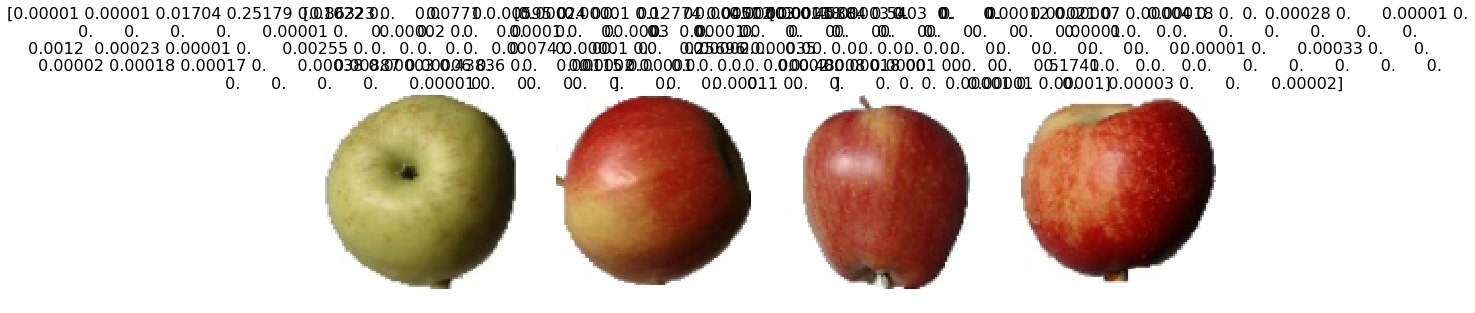

In [22]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [25]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[0]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
#     import pdb; pdb.set_trace()
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)[:5]

Most correct Apple Braeburn


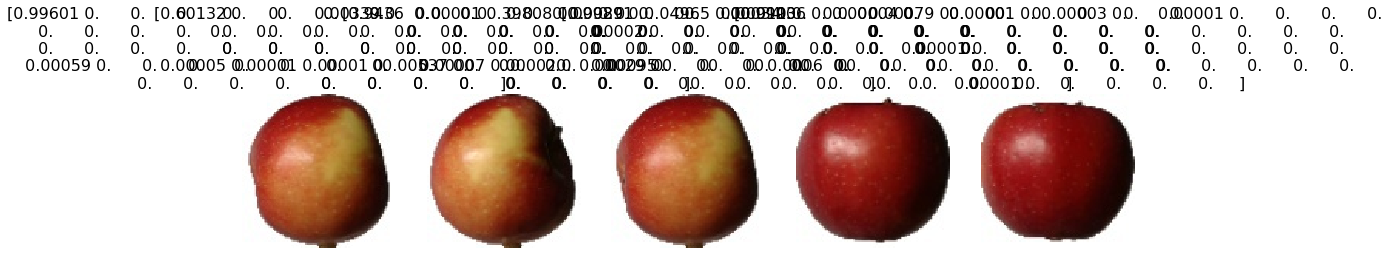

In [26]:
i = 0
plot_val_with_title(most_by_correct(i, True), "Most correct " + data.classes[i])


Most correct Apple Golden 1


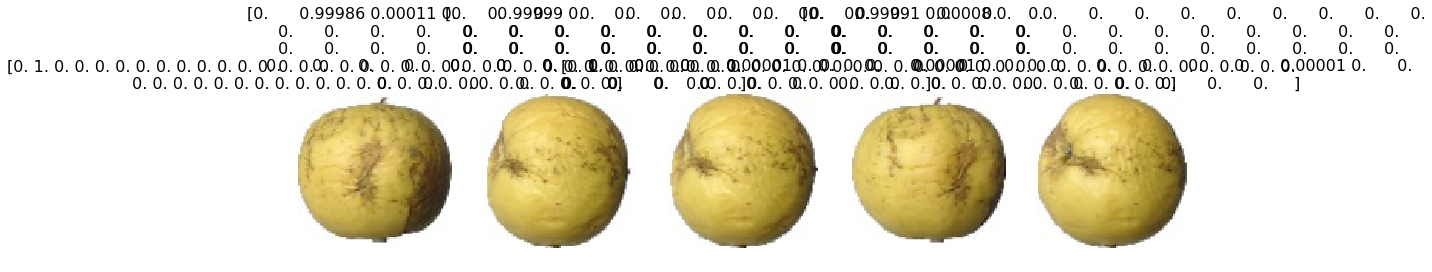

In [27]:
i = 1
plot_val_with_title(most_by_correct(i, True), "Most correct " + data.classes[i])


Most correct Apple Red 1


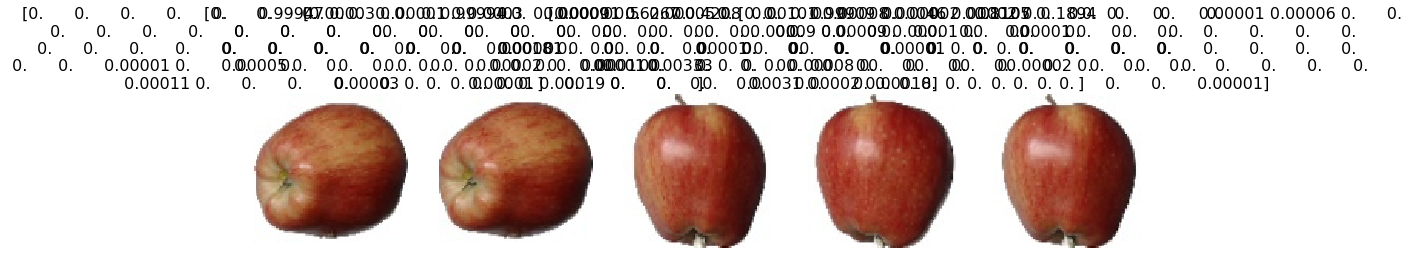

In [28]:
i = 5
plot_val_with_title(most_by_correct(i, True), "Most correct " + data.classes[i])


Most correct Apricot


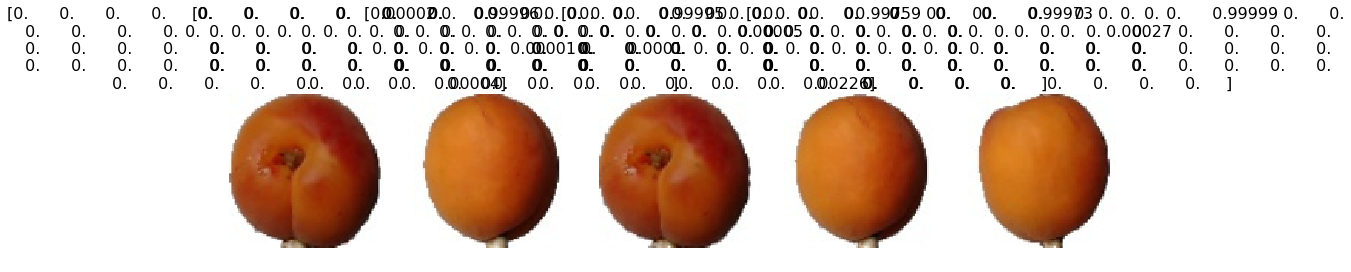

In [29]:
i = 10
plot_val_with_title(most_by_correct(i, True), "Most correct " + data.classes[i])


Most correct Dates


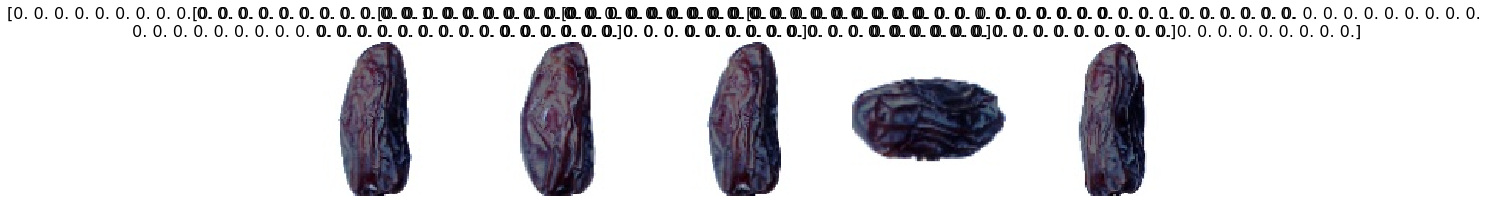

In [30]:
i = 20
plot_val_with_title(most_by_correct(i, True), "Most correct " + data.classes[i])


Most correct Kiwi


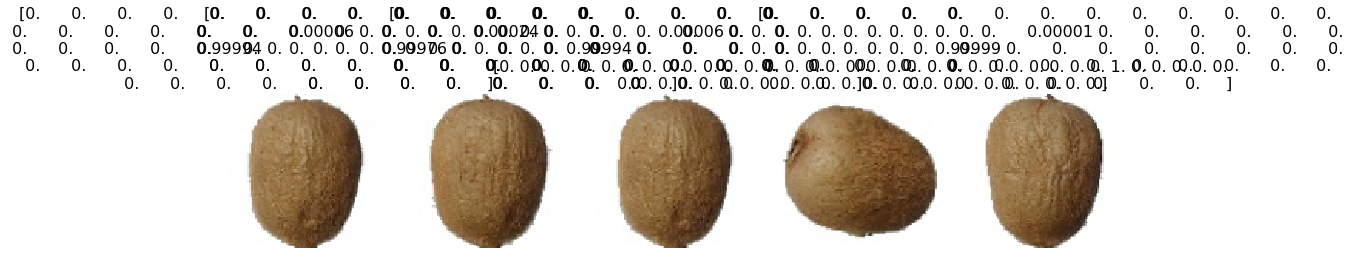

In [31]:
i = 30
plot_val_with_title(most_by_correct(i, True), "Most correct " + data.classes[i])


Most correct Orange


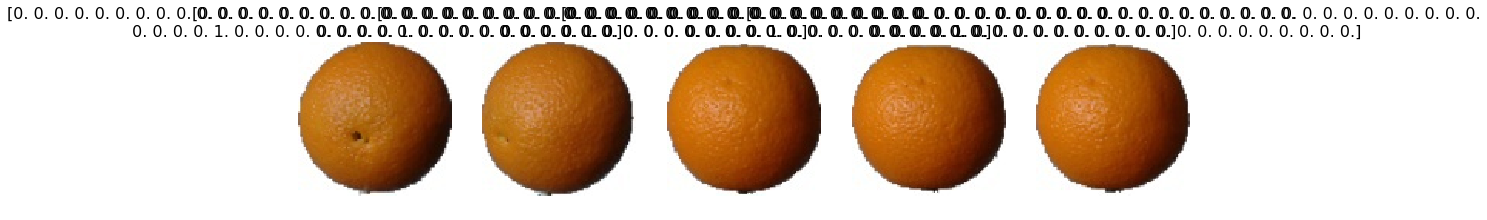

In [32]:
i = 40
plot_val_with_title(most_by_correct(i, True), "Most correct " + data.classes[i])


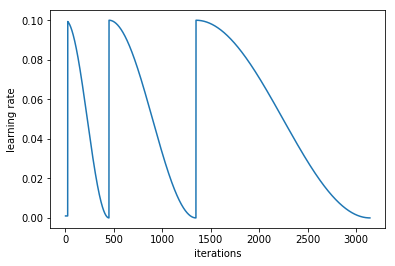

In [33]:
learn.sched.plot_lr()


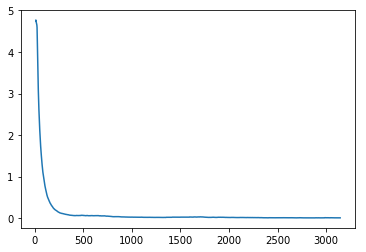

In [34]:
learn.sched.plot_loss()